In [32]:
!pip install feedparser

In [33]:
# ETAPA 1 - COLETA DE DADOS VIA RSS

import feedparser
import pandas as pd
from datetime import datetime

# FONTES RSS UTILIZADAS
rss_urls = [
    "https://www.rondoniaovivo.com/rss/",
    "https://www.rondoniagora.com/rss",
    "https://g1.globo.com/rss/g1/"
]

# FUNÇÃO DE COLETA
def coletar_noticias_rss(urls):
    noticias = []

    for url in urls:
        feed = feedparser.parse(url)

        for item in feed.entries:
            noticias.append({
                "titulo": item.get("title", ""),
                "descricao": item.get("summary", ""),
                "fonte": url,
                "data_coleta": datetime.now()
            })

    return pd.DataFrame(noticias)

# EXECUÇÃO DA COLETA
df_noticias = coletar_noticias_rss(rss_urls)

# Visualização inicial
df_noticias.head()


,titulo,descricao,fonte,data_coleta
0,Ladrões arrombam loja e roubam 300 camisas em ...,Uma loja de roupas foi arrombada durante a mad...,https://www.rondoniagora.com/rss,2025-12-14 21:28:14.406588
1,Briga entre duas mulheres termina com prisão n...,"Uma briga no Quintal Gastronômico, na região c...",https://www.rondoniagora.com/rss,2025-12-14 21:28:14.406601
2,"Condenado a mais de 87 anos, perigoso foragido...",O foragido da Justiça Wemerson Marcos da Silva...,https://www.rondoniagora.com/rss,2025-12-14 21:28:14.406604
3,Briga em motel termina com homem morto em Port...,Uma briga entre dois homens terminou com Faust...,https://www.rondoniagora.com/rss,2025-12-14 21:28:14.406606
4,Região central de Rondônia pode sofrer colapso...,Vários institutos de meterologia estão fazendo...,https://www.rondoniagora.com/rss,2025-12-14 21:28:14.406608


In [34]:
# ETAPA 2 - PRÉ-PROCESSAMENTO DOS TEXTOS

import re

# FUNÇÃO DE NORMALIZAÇÃO
def normalizar_texto(texto):
    texto = str(texto).lower()
    texto = re.sub(r"[^a-zà-ú0-9 ]", " ", texto)
    texto = re.sub(r"\s+", " ", texto)
    return texto.strip()

# CONSTRUÇÃO DO CAMPO DE TEXTO
df_noticias["texto"] = (
    df_noticias["titulo"].fillna("") + " " +
    df_noticias["descricao"].fillna("")
)

# APLICAÇÃO DA NORMALIZAÇÃO
df_noticias["texto"] = df_noticias["texto"].apply(normalizar_texto)

# FILTRO DE QUALIDADE
df_noticias = df_noticias[df_noticias["texto"].str.len() > 20]

# Reset de índice para manter organização
df_noticias = df_noticias.reset_index(drop=True)

# Visualização pós-processamento
df_noticias.head()


,titulo,descricao,fonte,data_coleta,texto
0,Ladrões arrombam loja e roubam 300 camisas em ...,Uma loja de roupas foi arrombada durante a mad...,https://www.rondoniagora.com/rss,2025-12-14 21:28:14.406588,ladrões arrombam loja e roubam 300 camisas em ...
1,Briga entre duas mulheres termina com prisão n...,"Uma briga no Quintal Gastronômico, na região c...",https://www.rondoniagora.com/rss,2025-12-14 21:28:14.406601,briga entre duas mulheres termina com prisão n...
2,"Condenado a mais de 87 anos, perigoso foragido...",O foragido da Justiça Wemerson Marcos da Silva...,https://www.rondoniagora.com/rss,2025-12-14 21:28:14.406604,condenado a mais de 87 anos perigoso foragido ...
3,Briga em motel termina com homem morto em Port...,Uma briga entre dois homens terminou com Faust...,https://www.rondoniagora.com/rss,2025-12-14 21:28:14.406606,briga em motel termina com homem morto em port...
4,Região central de Rondônia pode sofrer colapso...,Vários institutos de meterologia estão fazendo...,https://www.rondoniagora.com/rss,2025-12-14 21:28:14.406608,região central de rondônia pode sofrer colapso...


In [35]:
# ETAPA 3 - DATASET DE TREINAMENTO
# CLASSIFICAÇÃO DE NOTÍCIAS

dados_treino = [

    # EVENTO CRÍTICO
    ("acidente na rodovia deixa feridos", "evento_critico"),
    ("colisão entre veículos causa congestionamento", "evento_critico"),
    ("carreta tomba e interdita a pista", "evento_critico"),
    ("capotamento é registrado em estrada federal", "evento_critico"),
    ("atropelamento deixa pedestre ferido", "evento_critico"),
    ("batida frontal entre carros provoca bloqueio", "evento_critico"),
    ("ônibus se envolve em grave acidente", "evento_critico"),
    ("motociclista morre após colisão", "evento_critico"),
    ("queda de barreira bloqueia rodovia", "evento_critico"),
    ("manifestação interdita via principal", "evento_critico"),
    ("obra emergencial bloqueia trecho da estrada", "evento_critico"),
    ("ponte é interditada por risco estrutural", "evento_critico"),
    ("incêndio atinge vegetação às margens da rodovia", "evento_critico"),
    ("queimada provoca fumaça intensa na pista", "evento_critico"),
    ("fogo se espalha e prejudica visibilidade", "evento_critico"),
    ("bombeiros combatem incêndio florestal", "evento_critico"),
    ("chamas atingem área próxima à estrada", "evento_critico"),
    ("explosão causa interdição de avenida", "evento_critico"),
    ("acidente com caminhão bloqueia rodovia", "evento_critico"),
    ("engarrafamento após colisão múltipla", "evento_critico"),

    # CLIMA
    ("chuva forte provoca alagamentos", "clima"),
    ("temporal causa transtornos na região", "clima"),
    ("alagamento interrompe trânsito urbano", "clima"),
    ("forte chuva reduz visibilidade nas vias", "clima"),
    ("instabilidade climática provoca prejuízos", "clima"),
    ("vendaval derruba árvores", "clima"),
    ("tempestade atinge a cidade", "clima"),
    ("chuvas intensas elevam nível de rios", "clima"),
    ("alerta de chuva forte é emitido", "clima"),
    ("precipitação contínua causa transtornos", "clima"),
    ("defesa civil alerta para temporais", "clima"),
    ("volume elevado de chuva causa enchentes", "clima"),
    ("chuvas persistentes causam erosão", "clima"),
    ("tempestade severa atinge a região", "clima"),
    ("frente fria provoca pancadas de chuva", "clima"),

    # OUTRO
    ("prefeitura anuncia novas obras", "outro"),
    ("evento cultural movimenta a cidade", "outro"),
    ("campanha de vacinação é ampliada", "outro"),
    ("governo anuncia investimentos", "outro"),
    ("evento esportivo reúne participantes", "outro"),
    ("inauguração de espaço público atrai moradores", "outro"),
    ("reunião discute melhorias urbanas", "outro"),
    ("ações sociais beneficiam comunidade", "outro"),
    ("programa social é lançado", "outro"),
    ("comércio local promove feirão", "outro"),
    ("secretaria divulga novo cronograma", "outro"),
    ("projeto educacional é implementado", "outro"),
    ("audiência pública discute melhorias", "outro"),
    ("evento institucional ocorre no município", "outro"),
    ("prefeitura divulga nota oficial", "outro"),
]


In [36]:
# ETAPA 4 - TREINAMENTO DO MODELO
# TF-IDF + SVM LINEAR

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

df_treino = pd.DataFrame(dados_treino, columns=["texto", "categoria"])

X = df_treino["texto"]
y = df_treino["categoria"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

modelo = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1, 2))),
    ("clf", LinearSVC(class_weight="balanced"))
])

modelo.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
                ('clf', LinearSVC(class_weight='balanced'))])

In [37]:
# ETAPA 5 - AVALIAÇÃO DO MODELO

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = modelo.predict(X_test)

print("ACURÁCIA DO MODELO:", round(accuracy_score(y_test, y_pred), 4))
print("\nRELATÓRIO DE CLASSIFICAÇÃO:\n")
print(classification_report(y_test, y_pred))

print("MATRIZ DE CONFUSÃO:")
print(confusion_matrix(y_test, y_pred))


ACURÁCIA DO MODELO: 0.6667

RELATÓRIO DE CLASSIFICAÇÃO:

                precision    recall  f1-score   support

         clima       0.75      0.60      0.67         5
evento_critico       0.56      0.83      0.67         6
         outro       1.00      0.50      0.67         4

      accuracy                           0.67        15
     macro avg       0.77      0.64      0.67        15
  weighted avg       0.74      0.67      0.67        15

MATRIZ DE CONFUSÃO:
[[3 2 0]
 [1 5 0]
 [0 2 2]]


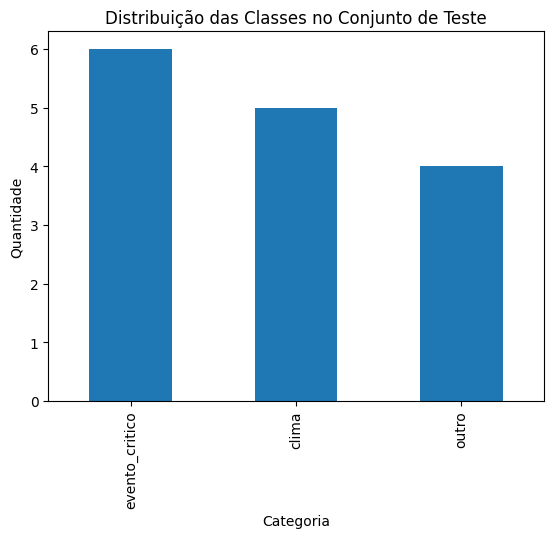

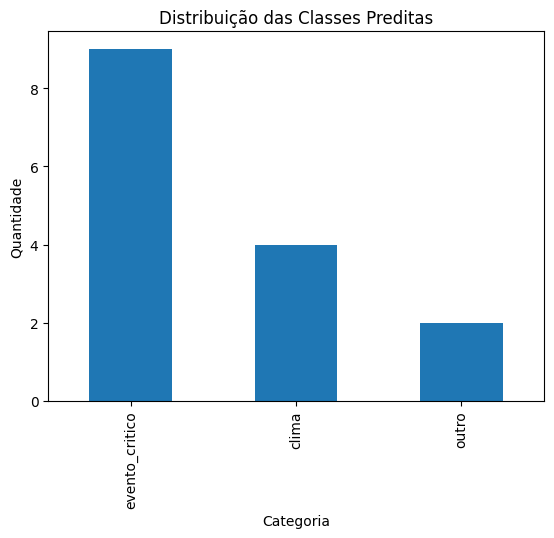

In [38]:
# ETAPA 6 - VISUALIZAÇÃO DOS RESULTADOS

import matplotlib.pyplot as plt
import pandas as pd

# Distribuição das classes reais no conjunto de teste
pd.Series(y_test).value_counts().plot(
    kind="bar",
    title="Distribuição das Classes no Conjunto de Teste"
)
plt.xlabel("Categoria")
plt.ylabel("Quantidade")
plt.show()

# Distribuição das previsões
pd.Series(y_pred).value_counts().plot(
    kind="bar",
    title="Distribuição das Classes Preditas"
)
plt.xlabel("Categoria")
plt.ylabel("Quantidade")
plt.show()


# INSIGHTS FINAIS E CONCLUSÕES

## Síntese dos Resultados

O pipeline desenvolvido conseguiu transformar notícias não estruturadas em categorias operacionais de forma consistente, partindo da coleta automatizada até a avaliação do modelo de classificação. A abordagem adotada mostrou-se adequada ao objetivo acadêmico proposto, com resultados interpretáveis e metodologicamente corretos.


## Distribuição das Classes no Conjunto de Teste

A distribuição equilibrada entre as classes no conjunto de teste garantiu uma avaliação justa do modelo, evitando viés excessivo para uma única categoria. A presença significativa de eventos críticos reflete o perfil das notícias coletadas, predominantemente associadas a incidentes com impacto direto.

**Leitura chave:** o conjunto de teste representa bem o cenário real observado nos dados coletados.


## Distribuição das Classes Preditas

O modelo apresentou tendência a classificar um maior volume de registros como **evento_critico**, indicando uma estratégia conservadora de classificação. Esse comportamento é desejável em cenários de monitoramento, onde a prioridade é identificar ocorrências relevantes, mesmo ao custo de alguns falsos positivos.

**Leitura chave:** o modelo privilegia sensibilidade a eventos críticos em detrimento da neutralidade.


## Avaliação do Desempenho

Com acurácia aproximada de 67%, o modelo demonstrou capacidade de generalização adequada para um conjunto de dados reduzido e com múltiplas classes. As métricas por classe evidenciam que os erros cometidos são semanticamente coerentes, concentrando-se em regiões de fronteira entre clima e eventos críticos.

**Leitura chave:** os erros não são aleatórios, mas reflexo da complexidade natural da linguagem jornalística.


## Limitações Identificadas

- base de treinamento construída manualmente e de tamanho limitado  
- ausência de dados históricos rotulados em larga escala  
- sobreposição semântica entre eventos climáticos e críticos  

Essas limitações são esperadas em projetos acadêmicos e não comprometem a validade do experimento.


## Possíveis Evoluções do Projeto

- expansão do dataset com exemplos reais rotulados  
- aplicação de validação cruzada para métricas mais robustas  
- análise de termos mais relevantes por classe (TF-IDF)  
- implementação de classificação hierárquica (crítico vs não crítico)  


## Conclusão Final

O projeto atingiu plenamente seus objetivos ao demonstrar a aplicação prática de técnicas de Processamento de Linguagem Natural em um problema realista de classificação de textos. A solução apresentada é simples, interpretável e extensível, estabelecendo uma base sólida para evoluções futuras tanto em contexto acadêmico quanto aplicado.
